<a href="https://colab.research.google.com/github/aiswaryabiju/CaseStudy/blob/main/ESC_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# import pandas as pd
# import librosa

# # Load metadata
# metadata_path = '/content/drive/MyDrive/Case Study_ESC/UrbanSound8K.csv'
# metadata = pd.read_csv(metadata_path)

# # Function to extract features using Mel-Frequency Cepstral Coefficients (MFCCs)
# def features_extractor(file, target_sampling_rate=22050, n_mfcc=40, segment_size=1024, hop_size=512):
#     audio, sample_rate = librosa.load(file, sr=target_sampling_rate, res_type='kaiser_fast')

#     # Extract MFCC features
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

#     # Compute mean MFCCs across segments
#     mfccs_mean = np.mean(mfccs.T, axis=0)

#     return mfccs_mean

# # Path to the directory containing audio files
# audio_directory = '/content/drive/MyDrive/Case Study_ESC/audio'

# # Initialize lists to store data
# audio_data = []
# slice_file_names = []
# classes = []

# # Iterate over each fold directory
# for fold_num in range(1, 11):
#     fold_dir = os.path.join(audio_directory, f'fold{fold_num}')

#     # Iterate over audio files in the fold directory
#     for file_name in os.listdir(fold_dir):
#         if file_name.endswith('.wav'):
#             file_path = os.path.join(fold_dir, file_name)
#             slice_file_names.append(file_name)

#             # Extract features from audio file
#             features = features_extractor(file_path)
#             audio_data.append(features)

#             # Retrieve class label from metadata based on slice file name
#             metadata_row = metadata[metadata['slice_file_name'] == file_name]
#             if not metadata_row.empty:
#                 class_label = metadata_row['class'].values[0]
#                 classes.append(class_label)
#             else:
#                 classes.append(None)  # If metadata is missing, append None

# # Create DataFrame
# df = pd.DataFrame({'mfcc_features': audio_data, 'slice_file_name': slice_file_names, 'class': classes})

# # Display DataFrame
# df.head()


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


,mfcc_features,slice_file_name,class
0,"[-367.81476, 128.26099, 29.322836, -21.599024,...",101415-3-0-3.wav,dog_bark
1,"[-422.12054, 69.941666, 9.877, 0.09410757, 1.6...",101415-3-0-8.wav,dog_bark
2,"[-259.88644, 107.98114, -50.56845, -5.4745603,...",102106-3-0-0.wav,dog_bark
3,"[-403.45078, 93.77245, 17.812965, -11.735519, ...",101415-3-0-2.wav,dog_bark
4,"[-386.4985, 131.81609, 26.0077, 22.088737, -9....",102305-6-0-0.wav,gun_shot


In [ ]:
df.columns

Index(['mfcc_features', 'class'], dtype='object')

In [ ]:
df['mfcc_features'].isna().sum()

0

In [ ]:
df['class'].isna().sum()

0

In [ ]:
df.shape

(8732, 2)

In [ ]:
# # Drop rows with null values in the 'class' column
# df.dropna(subset=['class'], inplace=True)

# # Reset index after dropping rows
# df.reset_index(drop=True, inplace=True)


In [ ]:
# df.drop(columns=['slice_file_name'], inplace=True)

# # Display the modified DataFrame
# print(df.head())

In [ ]:
# import pickle
# # Define the path where you want to save the DataFrame in pickle format
# pickle_file_path = '/content/drive/MyDrive/march 15/df_pickle.pkl'

# # Save the DataFrame to the specified path in pickle format
# df.to_pickle(pickle_file_path)


In [ ]:
import pandas as pd

# Define the path to the pickle file
pickle_file_path = '/content/df_pickle.pkl'

# Load the DataFrame from the pickle fil
df = pd.read_pickle(pickle_file_path)

# Display the loaded DataFrame
print(df.head())

                                       mfcc_features     class
0  [-367.81476, 128.26099, 29.322836, -21.599024,...  dog_bark
1  [-422.12054, 69.941666, 9.877, 0.09410757, 1.6...  dog_bark
2  [-259.88644, 107.98114, -50.56845, -5.4745603,...  dog_bark
3  [-403.45078, 93.77245, 17.812965, -11.735519, ...  dog_bark
4  [-386.4985, 131.81609, 26.0077, 22.088737, -9....  gun_shot


In [ ]:
import numpy as np
# Convert the filtered feature data to a flattened list
# flattened_features = [item for sublist in df['mfcc_features'] for item in sublist]

# Convert the flattened feature list to a NumPy array
X = np.array(df['mfcc_features'])

# Filter the labels to keep only the corresponding labels for the filtered feature data
y = np.array(df['class'])


In [ ]:
# Filter X and y to remove duplicates based on feature data
unique_samples = []
unique_labels = []
for sample, label in zip(X, y):
    if sample.tolist() not in unique_samples:
        unique_samples.append(sample.tolist())
        unique_labels.append(label)

X = np.array(unique_samples)
y = np.array(unique_labels)


In [ ]:
print("Shape of X",X.shape)
print("Shape of y",y.shape)


Shape of X (8732, 40)
Shape of y (8732,)


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split with validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

# Further split training data into training and validation sets
# Use 50% of the remaining data for validation and 50% for testing
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,random_state=1, stratify=y_test)

# Now X_train, y_train contain 70% of the data
# X_val, y_val contain 15% of the data
# X_test, y_test contain 15% of the data

# Define batch size and number of epochs
batch_size = 32
epochs = 50


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert character labels to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
y_val= label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

from tensorflow.keras.utils import to_categorical

# Convert numerical labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train= to_categorical(y_train, num_classes=num_classes)
y_val= to_categorical(y_val, num_classes=num_classes)
y_test= to_categorical(y_test, num_classes=num_classes)


In [ ]:
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of X_val",X_val.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)
print("Shape of y_val",y_val.shape)

Shape of X_train (6985, 40)
Shape of X_test (874, 40)
Shape of X_val (873, 40)
Shape of y_train (6985, 10)
Shape of y_test (874, 10)
Shape of y_val (873, 10)


In [ ]:
pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime
from sklearn import metrics
from sklearn.utils import shuffle
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import pickle


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adamax, Adadelta, Adagrad
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

import numpy as np

# Assume X_train_augmented and y_train are your training data
# Adjust this according to your data

# Define the CNN model
def build_model(params):
    model = Sequential()
    model.add(Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation=params['activation'], strides=1, padding='same', input_shape=(40, 1)))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation=params['activation'], strides=1, padding='same'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation=params['activation'], strides=1, padding='same'))
    model.add(Conv1D(filters=params['filters'], kernel_size=params['kernel_size'], activation=params['activation'], strides=1, padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(10, activation='softmax'))

    # Choose optimizer based on the hyperparameter
    if params['optimizer'] == 'adam':
        optimizer = Adam()
    elif params['optimizer'] == 'sgd':
        optimizer = SGD()
    elif params['optimizer'] == 'rmsprop':
        optimizer = RMSprop()
    elif params['optimizer'] == 'nadam':
        optimizer = Nadam()
    elif params['optimizer'] == 'adamax':
        optimizer = Adamax()
    elif params['optimizer'] == 'adadelta':
        optimizer = Adadelta()
    elif params['optimizer'] == 'adagrad':
        optimizer = Adagrad()
    else:
        raise ValueError("Invalid optimizer")

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:


# # Assume X_train_augmented and y_train are your training data
# # Adjust this according to your data

# # Define the objective function for hyperparameter optimization
# def objective(params):
#     model = KerasClassifier(build_fn=lambda: build_model(params), epochs=50, batch_size=int(params['batch_size']), verbose=0)
#     score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
#     return {'loss': -score, 'status': STATUS_OK}

# # Define the search space for hyperparameters
# space = {
#     'filters': hp.choice('filters', [16, 32, 64, 128, 256, 512]),
#     'kernel_size': hp.choice('kernel_size', [2, 4, 6, 8, 10, 12]),
#     'activation': hp.choice('activation', ['relu', 'linear', 'sigmoid', 'tanh']),
#     'optimizer': hp.choice('optimizer', ['adam', 'sgd', 'rmsprop', 'nadam', 'adamax', 'adadelta', 'adagrad']),
#     'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
#     'batch_size': hp.choice('batch_size', [16, 32, 64, 128, 256]),
# }

# # Perform hyperparameter optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=10,
#             trials=trials)

# print("Best Hyperparameters:", best)


  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 10%|█         | 1/10 [00:29<04:24, 29.37s/trial, best loss: -0.10716618257364695]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 20%|██        | 2/10 [02:34<11:25, 85.70s/trial, best loss: -0.8372070410201587] 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 30%|███       | 3/10 [04:31<11:40, 100.11s/trial, best loss: -0.8676382571751996]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 40%|████      | 4/10 [06:38<11:04, 110.72s/trial, best loss: -0.8676382571751996]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 50%|█████     | 5/10 [07:09<06:50, 82.01s/trial, best loss: -0.8676382571751996] 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 60%|██████    | 6/10 [07:26<03:59, 59.76s/trial, best loss: -0.8676382571751996]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 70%|███████   | 7/10 [12:55<07:23, 147.90s/trial, best loss: -0.8768003739777158]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 80%|████████  | 8/10 [13:23<03:39, 109.57s/trial, best loss: -0.8768003739777158]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



 90%|█████████ | 9/10 [15:28<01:54, 114.58s/trial, best loss: -0.8768003739777158]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)



100%|██████████| 10/10 [15:46<00:00, 94.62s/trial, best loss: -0.8768003739777158]
Best Hyperparameters: {'activation': 0, 'batch_size': 0, 'dropout_rate': 0.43949640887286107, 'filters': 5, 'kernel_size': 1, 'optimizer': 3}


In [ ]:
# with open('best_hyperparameters.pkl', 'wb') as f:
#     pickle.dump(best, f)

In [ ]:
import pickle

# Load the pickled object from the file
with open("/content/best_hyperparameters.pkl", "rb") as f:
    best_hyperparameters = pickle.load(f)

# Display the loaded object
print(best_hyperparameters)


{'activation': 0, 'batch_size': 0, 'dropout_rate': 0.43949640887286107, 'filters': 5, 'kernel_size': 1, 'optimizer': 3}


In [ ]:
import pickle

# Define the mapping dictionaries for activation functions and kernel sizes
activation_mapping = {0: 'relu', 1: 'linear', 2: 'sigmoid', 3: 'tanh'}
batch_size_mapping = {0: 16, 1: 32, 2: 64, 3: 128, 4: 256}
filters_mapping = {0: 16, 1: 32, 2: 64, 3: 128, 4: 256, 5: 512}
kernel_size_mapping = {0: 2, 1: 4, 2: 6, 3: 8, 4: 10, 5: 12}
optimizer_mapping = {0: 'adam', 1: 'sgd', 2: 'rmsprop', 3: 'nadam', 4: 'adamax', 5: 'adadelta', 6: 'adagrad'}

# Original hyperparameters with index values


best_hyperparameters={'activation': 0, 'batch_size': 0, 'dropout_rate': 0.43949640887286107, 'filters': 5, 'kernel_size': 1, 'optimizer': 3}


best_hyperparameters['activation'] = activation_mapping[best_hyperparameters['activation']]
best_hyperparameters['batch_size'] = batch_size_mapping[best_hyperparameters['batch_size']]
best_hyperparameters['filters'] = filters_mapping[best_hyperparameters['filters']]
best_hyperparameters['kernel_size'] = kernel_size_mapping[best_hyperparameters['kernel_size']]
best_hyperparameters['optimizer'] = optimizer_mapping[best_hyperparameters['optimizer']]

# Print the best hyperparameters with actual values
print("Best Hyperparameters:", best_hyperparameters)


Best Hyperparameters: {'activation': 'relu', 'batch_size': 16, 'dropout_rate': 0.43949640887286107, 'filters': 512, 'kernel_size': 4, 'optimizer': 'nadam'}


In [ ]:
#epoch loss graph  (5 seperate model and ensemble)
#epoch accuracy grap  (5 seperate model and ensemble)
#comparison graph of single model and ensemble
#area under the roc curve of predictor model
#confusion matrix of bayesian and ensemble


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Store the top 5 models
top_models = []

# Store the history of each model
histories = []

# Build and train the top 5 models
for i in range(5):
    # Build the model using the best hyperparameters
    model = build_model(best_hyperparameters)

    # Initialize lists to store metrics for each epoch
    train_loss, train_accuracy = [], []
    val_loss, val_accuracy = [], []

    # Train the model
    for epoch in range(1, 51):
        print(f"Training Model {i+1}, Epoch {epoch}")
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=54, callbacks=[early_stopping], verbose=1)

        # Print train loss and accuracy
        train_loss.append(history.history['loss'][0])
        train_accuracy.append(history.history['accuracy'][0])

        # Print validation loss and accuracy
        val_loss.append(history.history['val_loss'][0])
        val_accuracy.append(history.history['val_accuracy'][0])

        # Calculate test metrics after completing each epoch
        if epoch == 25:
            test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
            y_test_pred = model.predict(X_test)
            y_test_pred_classes = np.argmax(y_test_pred, axis=1)
            y_test_true_classes = np.argmax(y_test, axis=1)
            precision = precision_score(y_test_true_classes, y_test_pred_classes, average='weighted')
            recall = recall_score(y_test_true_classes, y_test_pred_classes, average='weighted')
            f1 = f1_score(y_test_true_classes, y_test_pred_classes, average='weighted')
            cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

            print(f"Test Loss: {test_loss}")
            print(f"Test Accuracy: {test_accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1}")
            print(f"Confusion Matrix:\n{cm}")
            print("-" * 50)

    # Append the trained model to the list of top models
    top_models.append(model)

    # Append the history of the current model to the list of histories
    histories.append({
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })

    print(f"Training of Model {i+1} Completed\n")


Training Model 1, Epoch 1
130/130 [==============================] - 10s 17ms/step - loss: 1.6542 - accuracy: 0.4089 - val_loss: 1.0687 - val_accuracy: 0.6312
Training Model 1, Epoch 2
130/130 [==============================] - 1s 11ms/step - loss: 0.9560 - accuracy: 0.6850 - val_loss: 0.7123 - val_accuracy: 0.7549
Training Model 1, Epoch 3
130/130 [==============================] - 1s 11ms/step - loss: 0.6009 - accuracy: 0.8001 - val_loss: 0.4673 - val_accuracy: 0.8511
Training Model 1, Epoch 4
130/130 [==============================] - 1s 11ms/step - loss: 0.4096 - accuracy: 0.8676 - val_loss: 0.4397 - val_accuracy: 0.8671
Training Model 1, Epoch 5
130/130 [==============================] - 1s 11ms/step - loss: 0.2935 - accuracy: 0.9004 - val_loss: 0.3996 - val_accuracy: 0.8797
Training Model 1, Epoch 6
130/130 [==============================] - 2s 12ms/step - loss: 0.2167 - accuracy: 0.9311 - val_loss: 0.4115 - val_accuracy: 0.8763
Training Model 1, Epoch 7
130/130 [================

In [ ]:
# Ensemble Learning - Majority Voting
def ensemble_predict(X):
    # Make predictions using each model
    predictions = [model.predict(X) for model in top_models]

    # Combine predictions using majority voting
    ensemble_predictions = np.argmax(np.sum(predictions, axis=0), axis=1)

    return ensemble_predictions

# Evaluate the ensemble model on the test set
ensemble_predictions = ensemble_predict(X_test)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_predictions)

print("Ensemble Model Test Accuracy:", ensemble_accuracy)



28/28 [==============================] - 0s 4ms/step
Ensemble Model Test Accuracy: 0.9324942791762014


In [ ]:
from sklearn.metrics import log_loss

# Calculate ensemble loss
ensemble_predictions_prob = np.array([model.predict(X_test) for model in top_models])
ensemble_predictions_avg_prob = np.mean(ensemble_predictions_prob, axis=0)
ensemble_loss = log_loss(y_test, ensemble_predictions_avg_prob)

print("Ensemble Model Test Loss:", ensemble_loss)


28/28 [==============================] - 0s 3ms/step
Ensemble Model Test Loss: 0.29259700559113516


In [ ]:
from sklearn.metrics import accuracy_score

# Store the accuracy of the ensemble model at each epoch
ensemble_accuracies = []

# Train the ensemble model
for epoch in range(1, 51):
    print(f"Training Ensemble Model, Epoch {epoch}")
    # Train the ensemble model using the entire training data
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=54, callbacks=[early_stopping], verbose=1)

    # Calculate ensemble accuracy on the test set
    ensemble_predictions = ensemble_predict(X_test)
    ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_predictions)
    ensemble_accuracies.append(ensemble_accuracy)

    # Print validation loss and accuracy
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")

    # Calculate test metrics after completing each epoch
    if epoch == 25:
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        y_test_pred = model.predict(X_test)
        y_test_pred_classes = np.argmax(y_test_pred, axis=1)
        y_test_true_classes = np.argmax(y_test, axis=1)
        precision = precision_score(y_test_true_classes, y_test_pred_classes, average='weighted')
        recall = recall_score(y_test_true_classes, y_test_pred_classes, average='weighted')
        f1 = f1_score(y_test_true_classes, y_test_pred_classes, average='weighted')
        cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

        print(f"Test Loss: {test_loss}")
        print(f"Test Accuracy: {test_accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print(f"Confusion Matrix:\n{cm}")
        print("-" * 50)

print("Training of Ensemble Model Completed\n")


Training Ensemble Model, Epoch 1
28/28 [==============================] - 0s 3ms/step
Validation Loss: 0.6718119978904724
Validation Accuracy: 0.9152348041534424
Training Ensemble Model, Epoch 2
28/28 [==============================] - 0s 2ms/step
Validation Loss: 0.6233319640159607
Validation Accuracy: 0.9266895651817322
Training Ensemble Model, Epoch 3
28/28 [==============================] - 0s 2ms/step
Validation Loss: 0.6061710119247437
Validation Accuracy: 0.9117984175682068
Training Ensemble Model, Epoch 4
28/28 [==============================] - 0s 3ms/step
Validation Loss: 0.7429742217063904
Validation Accuracy: 0.9152348041534424
Training Ensemble Model, Epoch 5
28/28 [==============================] - 0s 2ms/step
Validation Loss: 0.5873973965644836
Validation Accuracy: 0.9026346206665039
Training Ensemble Model, Epoch 6
28/28 [==============================] - 0s 2ms/step
Validation Loss: 0.7080018520355225
Validation Accuracy: 0.907216489315033
Training Ensemble Model, Epoc

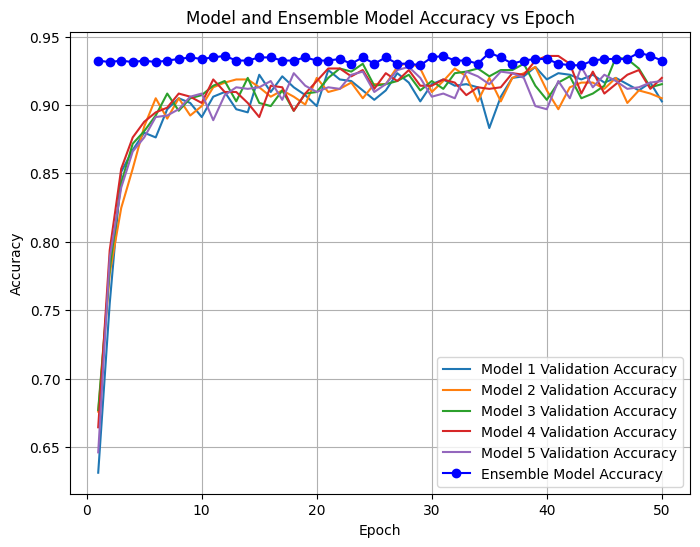

In [ ]:
import matplotlib.pyplot as plt

# Plot all accuracies in a single graph
plt.figure(figsize=(8,6))
for i, history in enumerate(histories):
    plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label=f'Model {i+1} Validation Accuracy')
plt.plot(range(1, len(ensemble_accuracies) + 1), ensemble_accuracies, label='Ensemble Model Accuracy', marker='o', color='b')
plt.title('Model and Ensemble Model Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

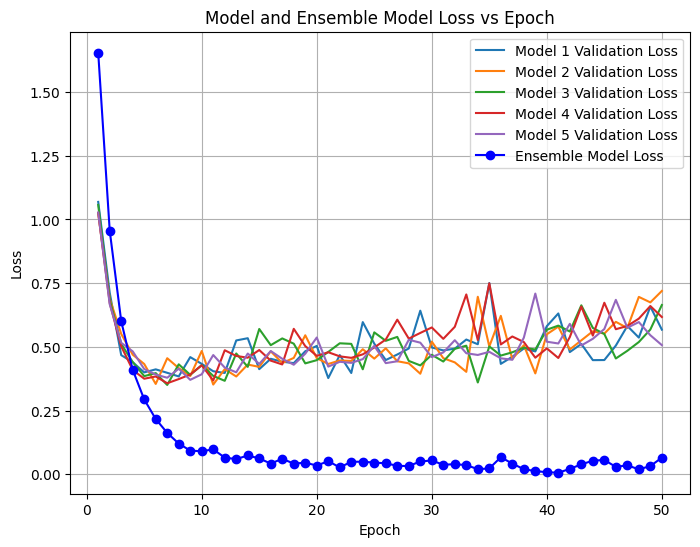

In [ ]:


# Plot all losses in a single graph
plt.figure(figsize=(8,6))
for i, history in enumerate(histories):
    plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], label=f'Model {i+1} Validation Loss')
plt.plot(range(1, len(histories[0]['train_loss']) + 1), histories[0]['train_loss'], label='Ensemble Model Loss', marker='o', color='b')
plt.title('Model and Ensemble Model Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Initialize a list to store the metrics for each model
metrics_list = []

# Calculate and store the metrics for each model
for i, model in enumerate(top_models, 1):
    # Calculate metrics on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_test_pred = model.predict(X_test)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)
    precision = precision_score(y_test_true_classes, y_test_pred_classes, average='weighted')
    recall = recall_score(y_test_true_classes, y_test_pred_classes, average='weighted')
    f1 = f1_score(y_test_true_classes, y_test_pred_classes, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

    # Calculate sensitivity and specificity for each class
    sensitivity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = []
    for c in range(cm.shape[0]):
        true_negative = np.sum(np.delete(np.delete(cm, c, axis=0), c, axis=1))
        false_positive = np.sum(np.delete(cm, c, axis=0)[:, c])
        false_negative = np.sum(cm[c, :]) - cm[c, c]
        true_positive = cm[c, c]
        specificity.append(true_negative / (true_negative + false_positive))

    # Average sensitivity and specificity over classes
    sensitivity_avg = np.mean(sensitivity)
    specificity_avg = np.mean(specificity)

    # Store the metrics in a dictionary
    metrics_dict = {
        'Model Name': f'Model {i}',
        'Loss': test_loss,
        'Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Sensitivity': sensitivity_avg,
        'Specificity': specificity_avg
    }

    # Append the dictionary to the metrics list
    metrics_list.append(metrics_dict)

# Create a DataFrame from the metrics list
metrics_df = pd.DataFrame(metrics_list)

# Print the DataFrame
print(metrics_df)


28/28 [==============================] - 0s 3ms/step
  Model Name      Loss  Accuracy  Precision    Recall  F1 Score  Sensitivity  \
0    Model 1  0.753616  0.884439   0.885063  0.884439  0.883891     0.891153   
1    Model 2  0.725306  0.906178   0.909941  0.906178  0.905833     0.905795   
2    Model 3  0.808288  0.899314   0.909397  0.899314  0.900046     0.904952   
3    Model 4  0.631535  0.906178   0.909083  0.906178  0.906498     0.910078   
4    Model 5  1.195850  0.907323   0.910802  0.907323  0.906955     0.905620   

   Specificity  
0     0.987049  
1     0.989476  
2     0.988714  
3     0.989481  
4     0.989584  


In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

# Assuming metrics_df contains the DataFrame with the metrics
table = tabulate(metrics_df, headers='keys', tablefmt='pipe', showindex=False)

print(table)


| Model Name   |     Loss |   Accuracy |   Precision |   Recall |   F1 Score |   Sensitivity |   Specificity |
|:-------------|---------:|-----------:|------------:|---------:|-----------:|--------------:|--------------:|
| Model 1      | 0.753616 |   0.884439 |    0.885063 | 0.884439 |   0.883891 |      0.891153 |      0.987049 |
| Model 2      | 0.725306 |   0.906178 |    0.909941 | 0.906178 |   0.905833 |      0.905795 |      0.989476 |
| Model 3      | 0.808288 |   0.899314 |    0.909397 | 0.899314 |   0.900046 |      0.904952 |      0.988714 |
| Model 4      | 0.631535 |   0.906178 |    0.909083 | 0.906178 |   0.906498 |      0.910078 |      0.989481 |
| Model 5      | 1.19585  |   0.907323 |    0.910802 | 0.907323 |   0.906955 |      0.90562  |      0.989584 |
